<a href="https://colab.research.google.com/github/Abhaykum123/Bitcoin_Price_Forecasting/blob/main/Bitvoin_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("/content/btcusd_1-min_data.csv")

In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134937 entries, 0 to 7134936
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 326.6 MB


In [5]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.set_index('Timestamp', inplace=True)
df = df.resample('D').mean()

In [6]:
df.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01,4.645697,4.645697,4.645697,4.645697,0.011919
2012-01-02,4.975000,4.975000,4.975000,4.975000,0.007014
2012-01-03,5.085500,5.085500,5.085500,5.085500,0.074365
2012-01-04,5.170250,5.170396,5.170250,5.170396,0.074468
2012-01-05,5.954292,5.954361,5.954292,5.954361,0.048839


In [7]:
# Price of Bitcoin Over the Year
fig = px.line(df, x=df.index, y='Close', title='Bitcoin Price Over the Years')
fig.update_traces(line=dict(color='gold'))
fig.update_layout(
    xaxis_title='Years',
    yaxis_title='US Dollars',
    template='plotly_dark',
    autosize=True
)
fig.show()

In [8]:
## Last eight year

In [9]:
df2 = df.iloc[(-365*8):]

In [10]:
df2.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
2017-07-30,2672.005028,2673.943007,2669.764708,2672.187639,8.248126
2017-07-31,2738.668701,2740.322875,2736.976215,2738.824854,6.684993
2017-08-01,2790.324708,2793.543507,2787.176243,2790.494403,9.338688
2017-08-02,2721.558222,2723.547833,2719.664285,2721.662257,6.254602
2017-08-03,2725.649278,2726.801632,2724.275042,2725.712167,5.549617


In [11]:
# Price of Bitcoin Over the Year
fig = px.line(df2, x=df2.index, y='Close', title='Bitcoin Price Over the Years')
fig.update_traces(line=dict(color='gold'))
fig.update_layout(
    xaxis_title='Years',
    yaxis_title='US Dollars',
    template='plotly_dark',
    autosize=True
)
fig.show()

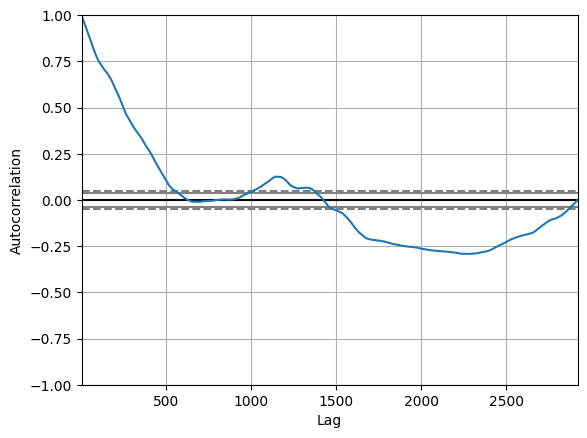

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2.Close)
plt.show()

In [13]:
fig = go.Figure()

for i, col in enumerate(df2.columns):
    fig.add_trace(go.Scatter(
        x=df2.index,
        y=df2[col],
        mode='lines',
        name=col,
    ))

fig.update_layout(
    title='Bitcoin Price Trends Over the Years',
    xaxis_title='Year',
    yaxis_title='Price (USD)',
    autosize=True
)

fig.show()


In [14]:
df_new = df.iloc[-200:].copy()

In [15]:
fig = go.Figure()

for i, col in enumerate(df.columns):
    fig.add_trace(go.Scatter(
        x=df_new.index,
        y=df_new[col],
        mode='lines',
        name=col,
    ))

fig.update_layout(
    title='Bitcoin Price Last 200 days',
    xaxis_title='Year',
    yaxis_title='Price (USD)',
    autosize=True
)

fig.show()


## <b> ROLLING FORECAST ARIMA

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
from statsmodels.tsa.arima.model import ARIMA
price = df2.Close
X = price.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=22500.866351, expected=22342.643056
predicted=22308.739712, expected=22392.032639
predicted=22433.291186, expected=22420.582639
predicted=22382.191489, expected=22393.123611
predicted=22351.329404, expected=22083.997917
predicted=22020.201912, expected=21717.604861
predicted=21655.510600, expected=20065.886806
predicted=19754.005155, expected=20269.563194
predicted=20340.533596, expected=20626.934028
predicted=20723.417321, expected=22652.586111
predicted=22924.006502, expected=24809.814583
predicted=25174.266938, expected=24728.451389
predicted=24610.593172, expected=24636.892361
predicted=24675.811225, expected=25981.045139
predicted=26433.778149, expected=27397.545833
predicted=27687.325966, expected=27353.770139
predicted=27253.725007, expected=27958.990278
predicted=28121.843069, expected=27992.556250
predicted=28104.888971, expected=28238.925000
predicted=28287.162546, expected=27670.886806
predicted=27589.357833, expected=28122.599306
predicted=28230.434149, expected=2

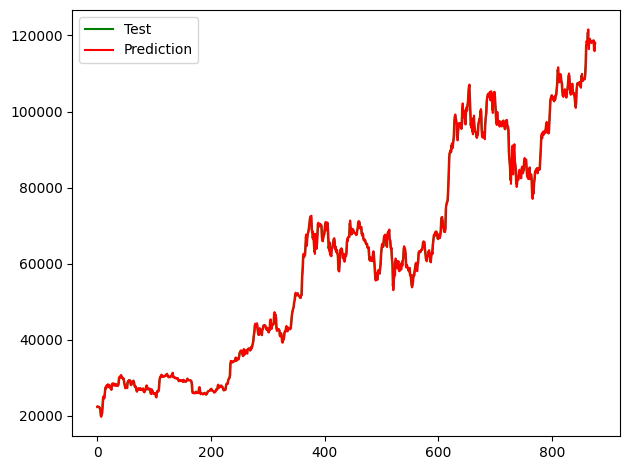

In [18]:
for t in range(len(test)):
		model = ARIMA(history, order=(5,1,0))
		model_fit = model.fit()
		output = model_fit.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test,color='green',label='Test')
plt.plot(predictions, color='red',label='Prediction')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1269.345


Test RMSE: 1269.345


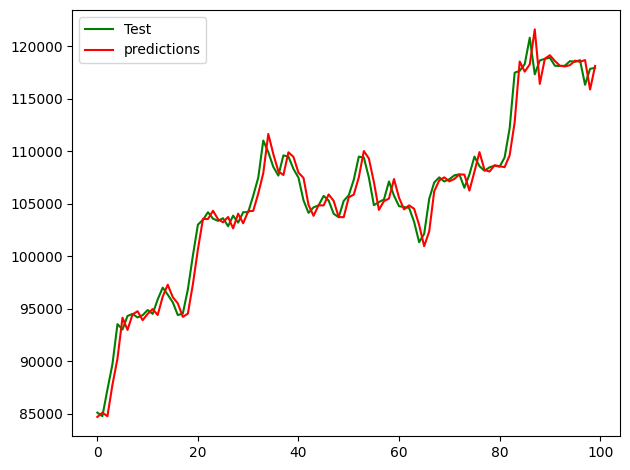

In [20]:
# plot forecasts against actual outcomes
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test[-100:],color='green',label='Test')
plt.plot(predictions[-100:], color='red',label ='predictions')
plt.legend()
plt.tight_layout()
plt.show()

### <b> Using PROPHET

In [21]:
from prophet import Prophet
import prophet

In [22]:
df2_1 = df2.copy()
df2_1.reset_index(inplace=True)
df2_1 = df2_1[['Timestamp','Close']]
df2_1.columns = ['ds', 'y']
x = df2_1
size = int(len(x) * 0.7)
train, test = x[0:size], x[size:len(x)]

In [23]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_sqher8n/hvvm2pga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_sqher8n/c3b8kpcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32212', 'data', 'file=/tmp/tmp_sqher8n/hvvm2pga.json', 'init=/tmp/tmp_sqher8n/c3b8kpcr.json', 'output', 'file=/tmp/tmp_sqher8n/prophet_model0b7wrktn/prophet_model-20250727223304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:33:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:33:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
# Create new data
future = model.make_future_dataframe(periods=len(test), freq = 'D')
forecast = model.predict(future)

In [25]:
y_test = test['y'].values
y_pred = forecast.yhat.values[-len(test):]
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 97692.973


In [26]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-30,6667.137254,-1811.998429,8699.839652,6667.137254,6667.137254,-3337.912838,-3337.912838,-3337.912838,-23.917216,-23.917216,-23.917216,-3313.995622,-3313.995622,-3313.995622,0.0,0.0,0.0,3329.224416
1,2017-07-31,6675.820942,-1940.999075,9408.377648,6675.820942,6675.820942,-3188.492066,-3188.492066,-3188.492066,-4.286600,-4.286600,-4.286600,-3184.205466,-3184.205466,-3184.205466,0.0,0.0,0.0,3487.328876
2,2017-08-01,6684.504629,-1465.057208,9040.228719,6684.504629,6684.504629,-3050.658280,-3050.658280,-3050.658280,4.897574,4.897574,4.897574,-3055.555855,-3055.555855,-3055.555855,0.0,0.0,0.0,3633.846349
3,2017-08-02,6693.188317,-1668.156431,9733.486648,6693.188317,6693.188317,-2900.496336,-2900.496336,-2900.496336,27.823571,27.823571,27.823571,-2928.319906,-2928.319906,-2928.319906,0.0,0.0,0.0,3792.691981
4,2017-08-03,6701.872005,-1624.592807,9323.724567,6701.872005,6701.872005,-2772.142239,-2772.142239,-2772.142239,30.643428,30.643428,30.643428,-2802.785667,-2802.785667,-2802.785667,0.0,0.0,0.0,3929.729766


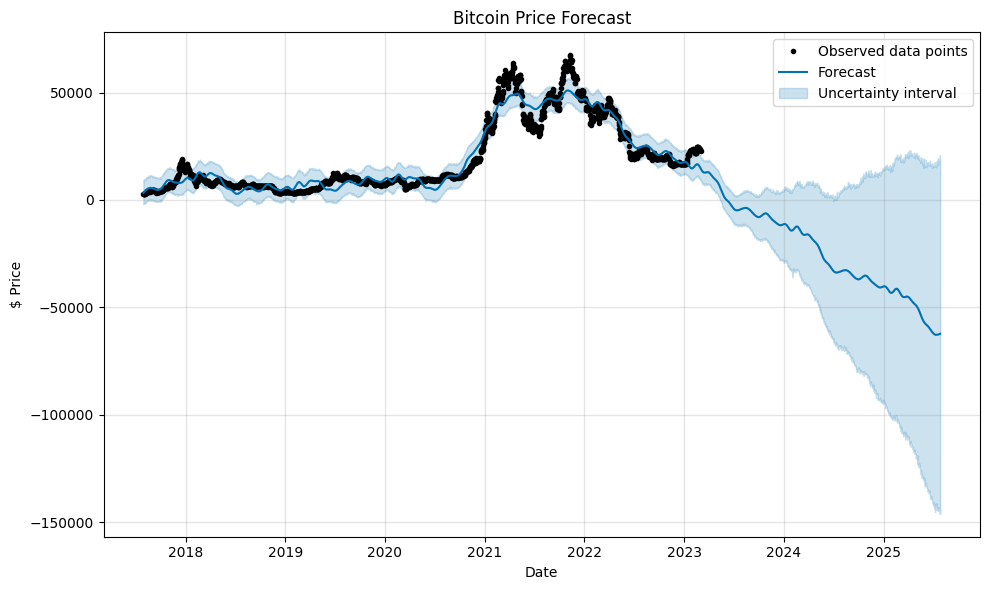

In [27]:
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Bitcoin Price Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('$ Price')
lines = ax.get_lines()
lines[-1].set_label('Forecast')
ax.legend()
plt.tight_layout()
plt.show()

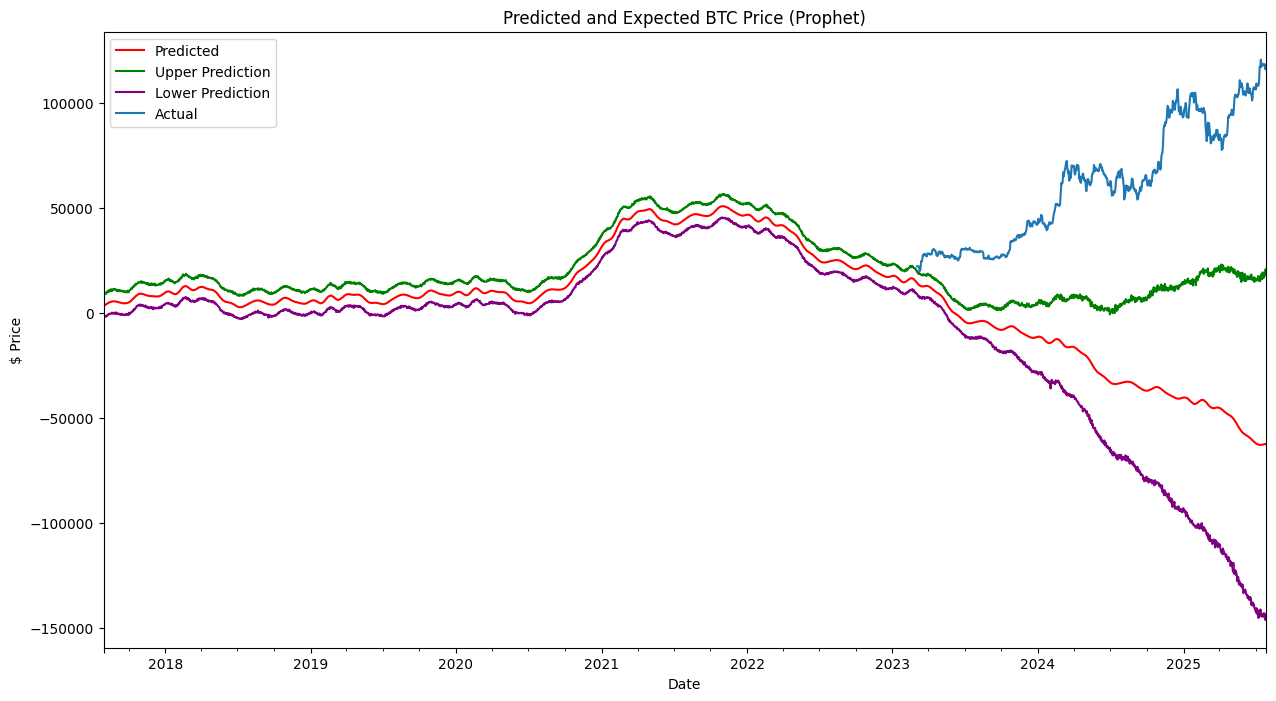

In [28]:
# Plotting forecast with test data
ax = forecast.plot(x='ds', y='yhat', legend=True, label="Predicted", figsize=(15,8), color='red')
forecast.plot(x='ds', y='yhat_upper', legend=True, label='Upper Prediction', ax=ax, color='green')
forecast.plot(x='ds', y='yhat_lower', legend=True, label='Lower Prediction', ax=ax, color='purple')
test.plot(x='ds', y='y', legend=True, label='Actual', ax=ax)
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.title('Predicted and Expected BTC Price (Prophet)')
plt.legend(loc='best')
plt.show()

## ARIMA MODEL

In [29]:
from statsmodels.tsa.arima.model import ARIMA

def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)

def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [30]:
df2_2 = df2.copy()

In [31]:
price = df2['Close']
X = price.values
datesX = price.index
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:]
plotDates = datesX[size:]

In [32]:
# ARIMA (5,1,0) on differenced data
days_in_year = 365
differenced = difference(train, days_in_year)

model = ARIMA(differenced, order=(5, 1, 0))
model_fit = model.fit()

start_index = len(differenced)
end_index = start_index + len(test) - 1

forecast = model_fit.predict(start=start_index, end=end_index)

In [33]:
history = [x for x in train]
day = 1
predicted_results = list()

In [34]:
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print("Predicted Day %d: %f" % (day, inverted))
    history.append(inverted)
    predicted_results.append(inverted)
    day += 1

Predicted Day 1: 20906.919171
Predicted Day 2: 18247.986015
Predicted Day 3: 18164.246902
Predicted Day 4: 17466.142296
Predicted Day 5: 17510.133197
Predicted Day 6: 19862.092026
Predicted Day 7: 19166.392003
Predicted Day 8: 18095.957676
Predicted Day 9: 18056.738200
Predicted Day 10: 18010.229252
Predicted Day 11: 17634.893086
Predicted Day 12: 17947.087554
Predicted Day 13: 18978.025019
Predicted Day 14: 19959.031931
Predicted Day 15: 19819.956761
Predicted Day 16: 20829.658280
Predicted Day 17: 20778.061803
Predicted Day 18: 20147.142421
Predicted Day 19: 21240.341171
Predicted Day 20: 21289.906482
Predicted Day 21: 22105.300272
Predicted Day 22: 23222.922977
Predicted Day 23: 23403.907919
Predicted Day 24: 23676.847893
Predicted Day 25: 26090.257661
Predicted Day 26: 26612.571193
Predicted Day 27: 26308.668898
Predicted Day 28: 25909.279646
Predicted Day 29: 24458.253380
Predicted Day 30: 25489.583027
Predicted Day 31: 25256.141625
Predicted Day 32: 25091.431679
Predicted Day 33:

In [35]:
# Evalute
rmse = np.sqrt(mean_squared_error(test, predicted_results))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 83493.217


In [36]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1678
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14260.752
Date:                Sun, 27 Jul 2025   AIC                          28533.504
Time:                        22:33:06   BIC                          28566.053
Sample:                             0   HQIC                         28545.562
                               - 1678                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2051      0.020     10.360      0.000       0.166       0.244
ar.L2         -0.0224      0.019     -1.198      0.231      -0.059       0.014
ar.L3         -0.0339      0.016     -2.107      0.0

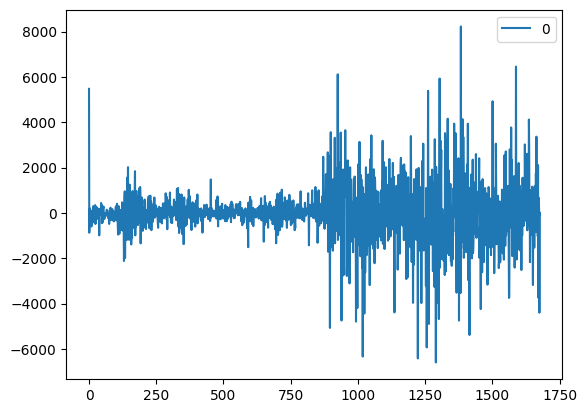

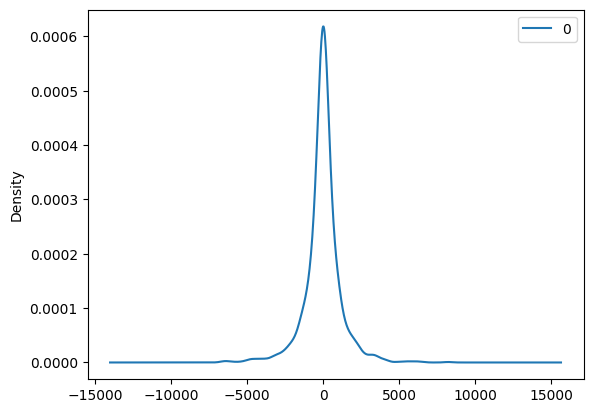

In [37]:
# density plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [38]:
# summary stats of residuals
print(residuals.describe())

                 0
count  1678.000000
mean     -9.583379
std    1201.078165
min   -6595.234788
25%    -405.940075
50%       0.765367
75%     406.146798
max    8222.828287


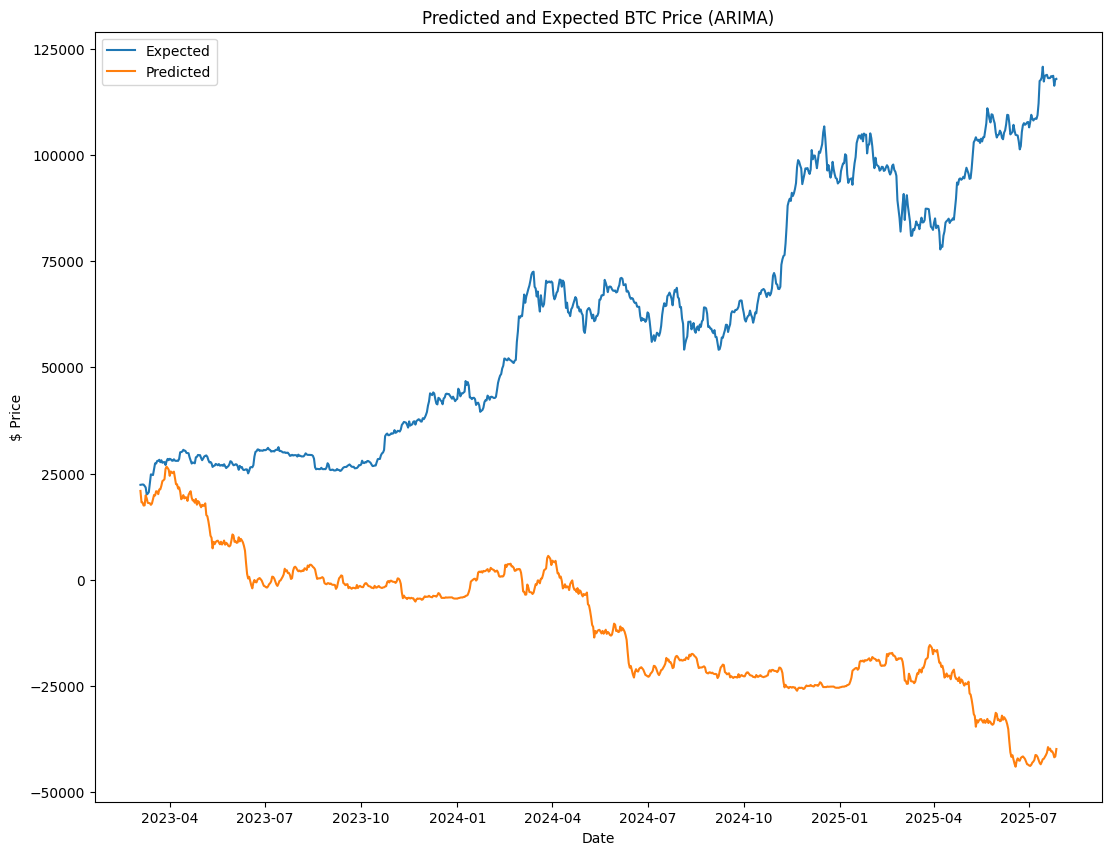

In [39]:
plt.figure(figsize=(13,10))
plt.plot(plotDates, test, label='Expected')
plt.plot(plotDates, predicted_results, label='Predicted')
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.title('Predicted and Expected BTC Price (ARIMA)')
plt.show()

## LSTM

In [40]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten, BatchNormalization, Bidirectional
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from statsmodels.graphics.tsaplots import plot_acf

In [41]:
df2_3 = df2.copy()
price = df2.Close

In [42]:
X = price
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
training_values = train.values
training_values = np.reshape(training_values, (len(training_values), 1))

In [43]:
# Scale the data using minMaxScaler
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

In [44]:
x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [45]:
model = Sequential()
model.add(Bidirectional(LSTM(units=20, return_sequences=True, activation='relu'), input_shape=(None, 1)))
model.add(Bidirectional(LSTM(units=20, return_sequences=True, activation='relu')))
model.add(Bidirectional(LSTM(units=20, return_sequences=False, activation='relu')))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001, decay=1e-6)
model.compile(optimizer=optimizer, loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning:

Argument `decay` is no longer supported and will be ignored.



In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, None, 40)       │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, None, 40)       │         9,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 40)             │         9,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,081 (90.16 KB)

 Trainable params: 23,081 (90.16 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.fit(x_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.1154
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0512
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3453e-04
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0866e-04
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4440e-04
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5623e-04
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2221e-04
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9617e-04
Epoch 13/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6893e-04
Epoch 14/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7995e-04
Epoch 15/100
64/64 ━━━━━━━━━━━━━━━━━━

In [48]:
test_values = test.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))  # (samples, timesteps, features)
predicted_price = model.predict(test_values)
predicted_price = scaler.inverse_transform(predicted_price)


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step


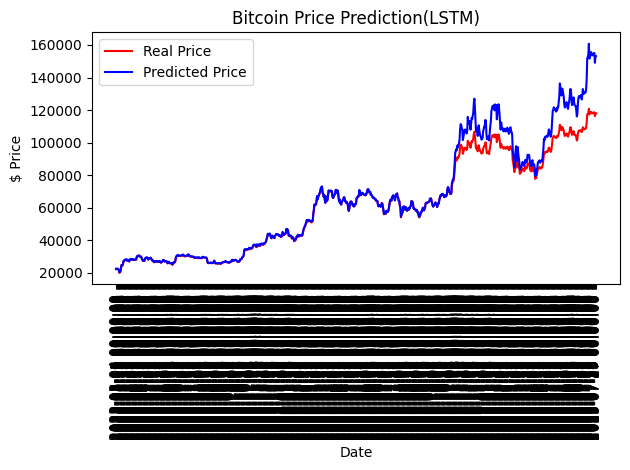

In [49]:
ax = plt.gca()
plt.plot(test.values, color='red', label='Real Price')
plt.plot(predicted_price, color='blue', label='Predicted Price')
plt.title('Bitcoin Price Prediction(LSTM)')
test = test.reset_index()
x = test.index
labels = test['Timestamp']
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Date')
plt.ylabel('$ Price')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [50]:
rmse = np.sqrt(mean_squared_error(test.Close.values, predicted_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8657.335


## XGBOOST MODEL

In [51]:
df2_4 = df2.copy()
df2_4.index = pd.to_datetime(df2_4.index)

size = int(len(df2_4) * 0.7)
data_train = df2_4.iloc[:size]
data_test = df2_4.iloc[size:]

In [52]:
def create_features(df, label=None):
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a DatetimeIndex.")

    df = df.copy()
    df['MA_30'] = df['Close'].rolling(window=30).mean()
    df['MA_90'] = df['Close'].rolling(window=90).mean()
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=30).std()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['Momentum'] = df['Close'] - df['Close'].shift(10)

    df.dropna(inplace=True)

    X = df[['MA_30', 'MA_90', 'EMA_10', 'Volatility']].values

    if label is not None:
        y = df[label].values
        return X, y, df

    return X, df

In [53]:
# assigning training and testing, features and labels
X_train, y_train, df_train = create_features(data_train, label='Close')
X_test, y_test, df_test = create_features(data_test, label='Close')

In [54]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_absolute_error

In [55]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    booster='gbtree',
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    min_child_weight=10,
    colsample_bytree=0.02,
    n_estimators=500,
    random_state=42
)

In [56]:
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

[0]	validation_0-rmse:14955.81797	validation_1-rmse:49686.92778
[1]	validation_0-rmse:13494.55204	validation_1-rmse:46933.30468
[2]	validation_0-rmse:12180.09144	validation_1-rmse:44427.50512
[3]	validation_0-rmse:12037.63701	validation_1-rmse:44704.73256
[4]	validation_0-rmse:11020.14304	validation_1-rmse:43097.22041
[5]	validation_0-rmse:10120.24146	validation_1-rmse:41664.00331
[6]	validation_0-rmse:10010.75212	validation_1-rmse:41870.49612
[7]	validation_0-rmse:9931.96600	validation_1-rmse:42053.72232
[8]	validation_0-rmse:9160.47663	validation_1-rmse:40794.33916
[9]	validation_0-rmse:9096.69023	validation_1-rmse:40927.58498
[10]	validation_0-rmse:8245.41828	validation_1-rmse:39142.02766
[11]	validation_0-rmse:8201.20382	validation_1-rmse:39243.03554
[12]	validation_0-rmse:7445.35204	validation_1-rmse:37528.73689
[13]	validation_0-rmse:6923.17036	validation_1-rmse:36811.87379
[14]	validation_0-rmse:6899.98729	validation_1-rmse:36879.45637
[15]	validation_0-rmse:6341.54810	validatio

XGBRegressor(alpha=10, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.02, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, ...)

In [57]:
# assign prediction to data_test and the data all
df_test['Close_Prediction'] = model.predict(X_test)
data_all = pd.concat([df_train, df_test], sort=False)

<Axes: xlabel='Timestamp'>

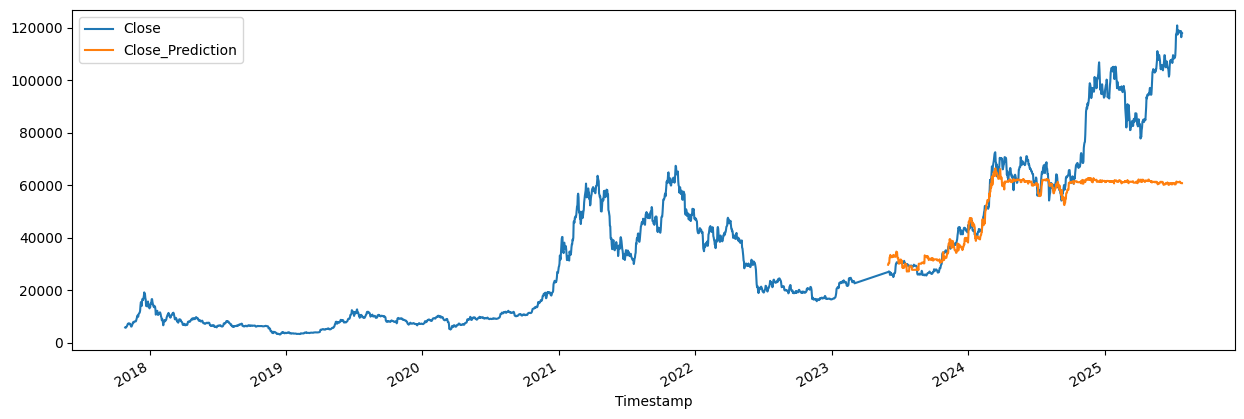

In [58]:
data_all[['Close','Close_Prediction']].plot(figsize=(15, 5))

In [59]:
mae = mean_absolute_error(df_test['Close'].values, df_test['Close_Prediction'].values)
print('Test MAE: %.3f' % mae)

Test MAE: 14521.960


## Conclusion

In [64]:
import plotly.graph_objects as go

# Models and RMSE values
models = ['Prophet', 'ARIMA', 'LSTM', 'XGBoost']
rmse_values = [1269.345, 83493.217, 8657.335, 14521.960]

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(
        x=models,
        y=rmse_values,
        text=[f'{val:.2f}' for val in rmse_values],
        textposition='auto',
        marker_color='indianred'
    )
])

# Customize layout
fig.update_layout(
    title='RMSE of the Models',
    xaxis_title='Models',
    yaxis_title='RMSE',
    template='plotly_white',
    width=700,
    height=500
)

fig.show()
